In [3]:
# Load the cleaned dataset
data_cleaned = pd.read_csv('/Users/parsabahrami/Customer Lifetime Value Model/data/cleaned_data.csv')

# Quick look at the first few rows
print(data_cleaned.head())

# Check for any remaining missing values
print("Missing Values:\n", data_cleaned.isnull().sum())

# Check data types
print("Data Types:\n", data_cleaned.dtypes)


   CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female  42.0       2       0.00              1   
1          608     Spain  Female  41.0       1   83807.86              1   
2          502    France  Female  42.0       8  159660.80              3   
3          699    France  Female  39.0       1       0.00              2   
4          850     Spain  Female  43.0       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  
Missing Values:
 CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
E

In [4]:
print(data_cleaned.describe())


        CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10002.000000  10002.000000  10002.000000   10002.000000   10002.000000   
mean     650.587582     38.661171      5.012498   76491.112875       1.530194   
std       96.567037      9.745669      2.891973   62393.474144       0.581639   
min      383.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127647.840000       2.000000   
max      850.000000     62.000000     10.000000  250898.090000       4.000000   

          HasCrCard  IsActiveMember  EstimatedSalary        Exited  
count  10002.000000    10002.000000     10002.000000  10002.000000  
mean       0.705559        0.514997    100083.331145      0.203759  
std        0.455814        0.499800     57508.117802      0.402

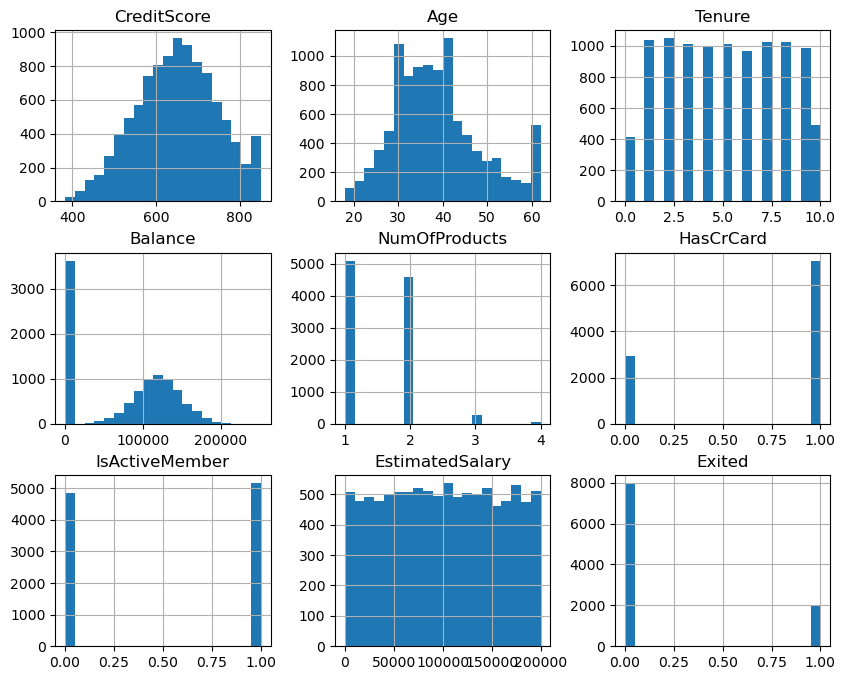

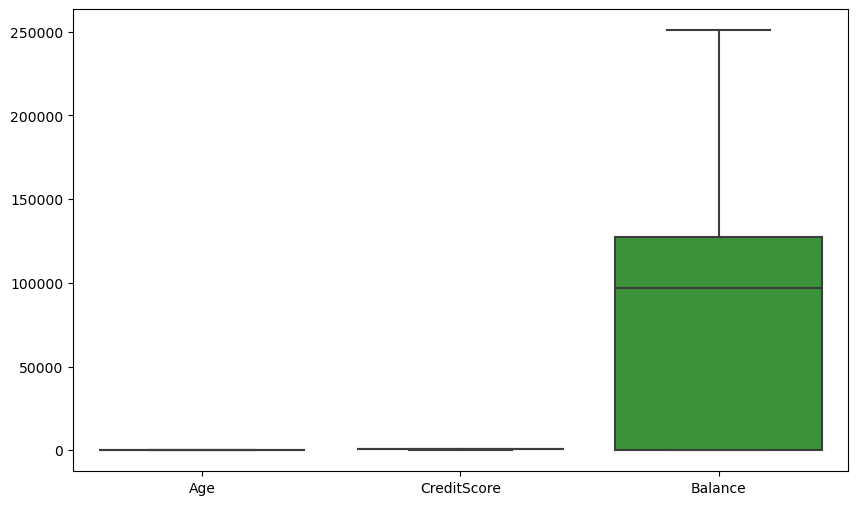

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical columns
data_cleaned.hist(bins=20, figsize=(10, 8))
plt.show()

# Boxplot for Age, CreditScore, and Balance
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_cleaned[['Age', 'CreditScore', 'Balance']])
plt.show()


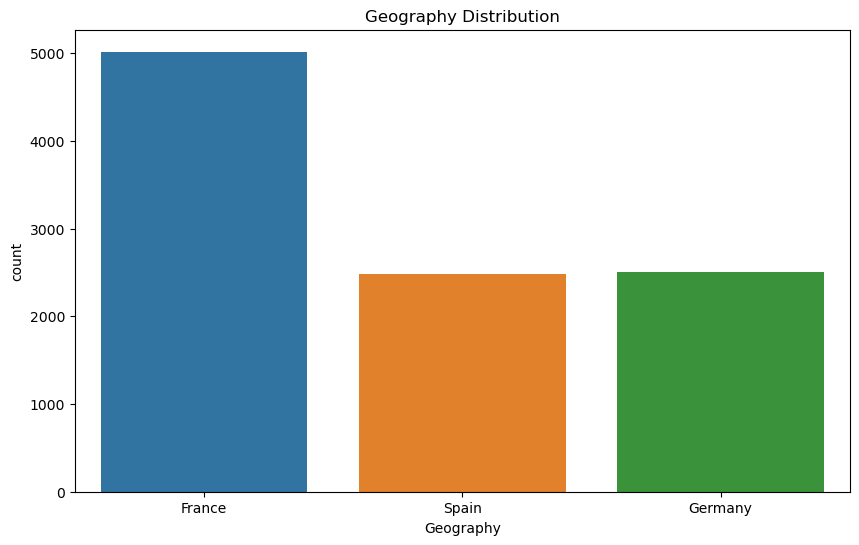

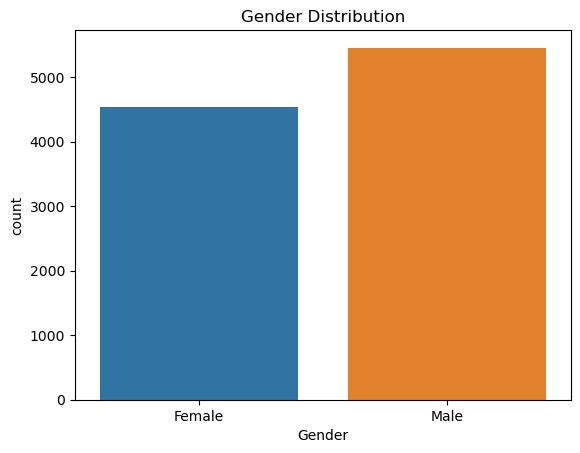

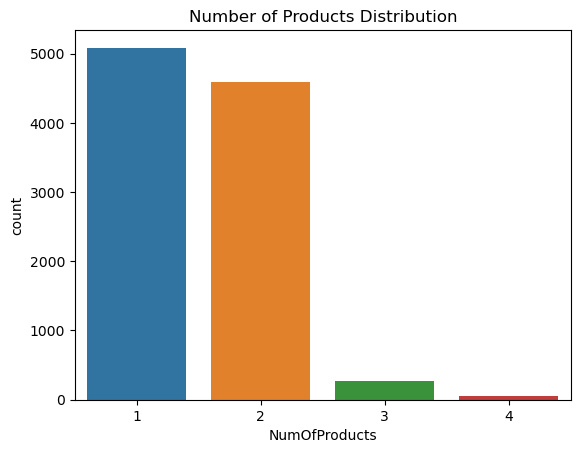

In [6]:
# Count plots for categorical columns
plt.figure(figsize=(10, 6))
sns.countplot(x='Geography', data=data_cleaned)
plt.title('Geography Distribution')
plt.show()

sns.countplot(x='Gender', data=data_cleaned)
plt.title('Gender Distribution')
plt.show()

sns.countplot(x='NumOfProducts', data=data_cleaned)
plt.title('Number of Products Distribution')
plt.show()


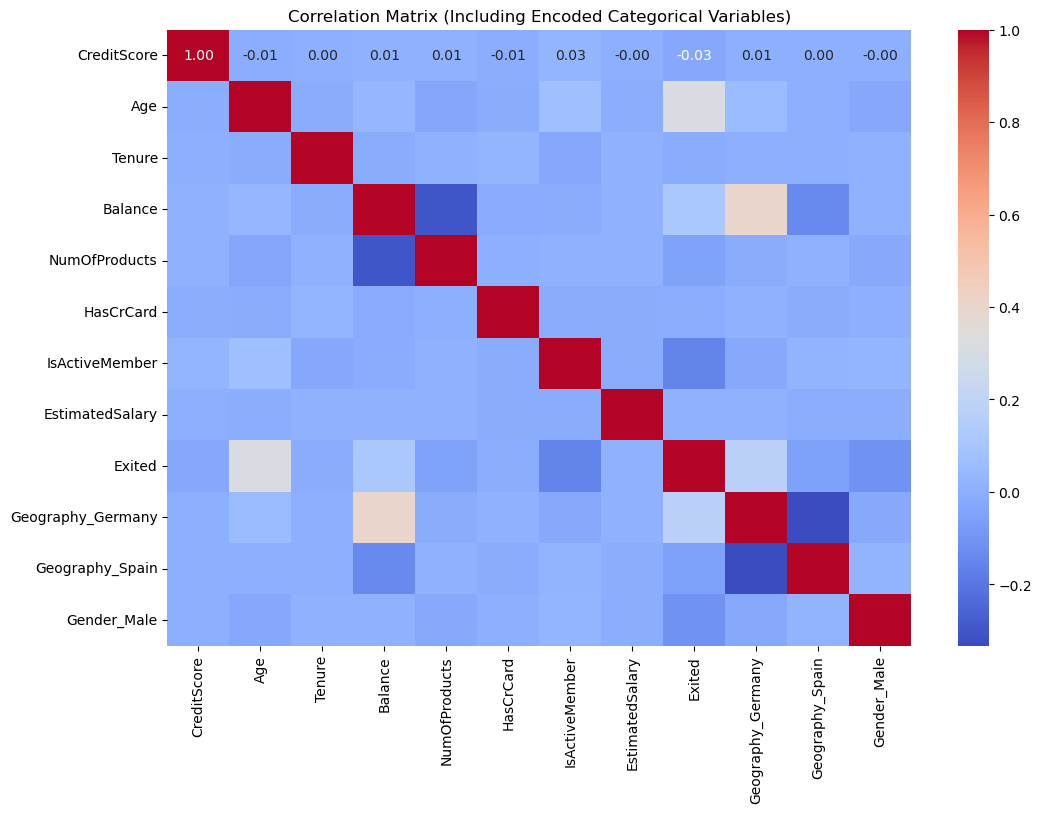

In [8]:
# One-hot encoding for categorical variables like Geography and Gender
data_encoded = pd.get_dummies(data_cleaned, drop_first=True)

# Now calculate the correlation matrix
correlation_matrix = data_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Including Encoded Categorical Variables)')
plt.show()



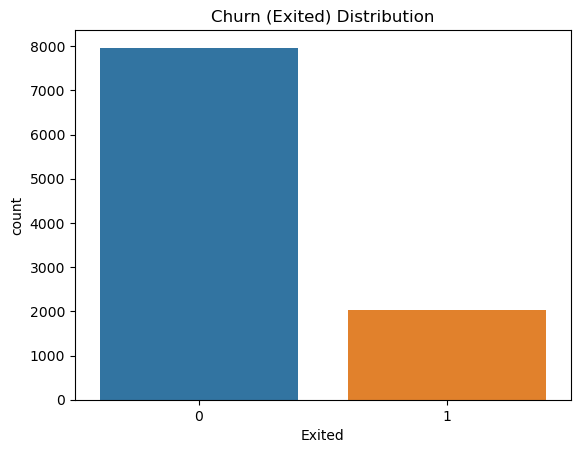

In [9]:
sns.countplot(x='Exited', data=data_cleaned)
plt.title('Churn (Exited) Distribution')
plt.show()


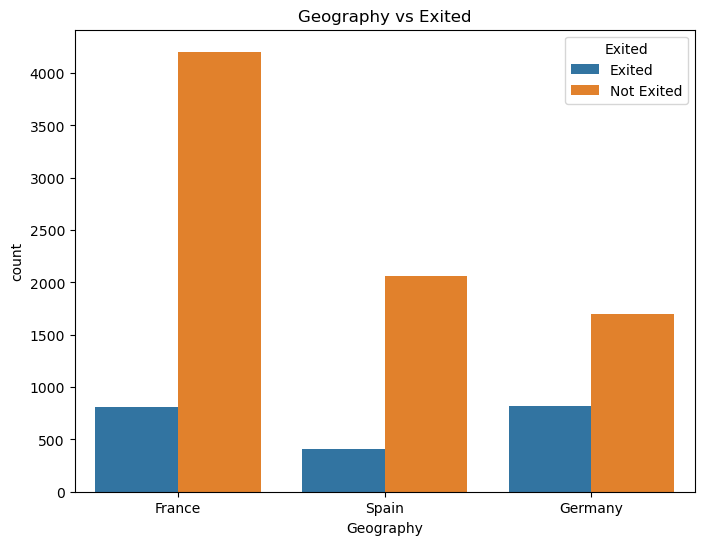

In [12]:
# Map the 'Exited' column to more descriptive labels
data_cleaned['Exited'] = data_cleaned['Exited'].map({0: 'Not Exited', 1: 'Exited'})

# Now, recreate the plot with the mapped labels
import matplotlib.pyplot as plt
import seaborn as sns

# Grouped bar plot for categorical feature 'Geography' and 'Exited'
plt.figure(figsize=(8, 6))
sns.countplot(x='Geography', hue='Exited', data=data_cleaned)
plt.title('Geography vs Exited')
plt.show()



/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


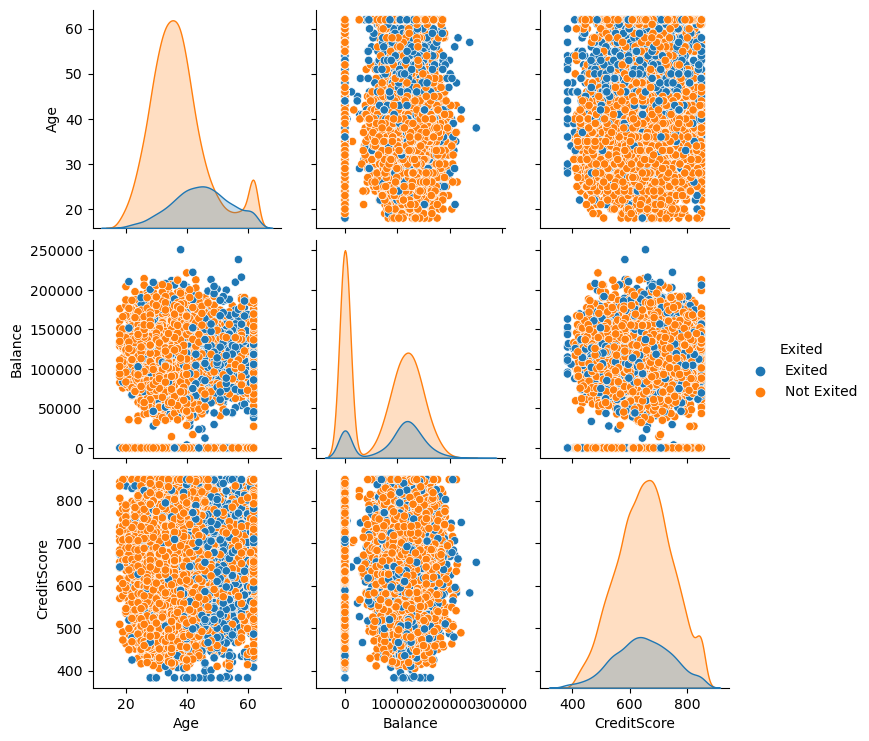

In [13]:
# Pair plot of important features
sns.pairplot(data_cleaned[['Age', 'Balance', 'CreditScore', 'Exited']], hue='Exited')
plt.show()
